In [4]:
# Import the libraries we need to use in this lab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('C:/Users/KIIT0001/Desktop/Data Analyst/credit card fraud detection/creditcard.csv')


In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


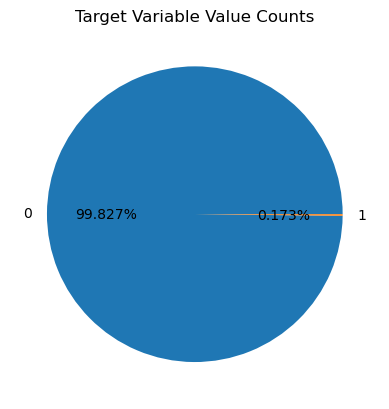

In [9]:
labels = data['Class'].unique()
sizes = data.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [10]:
corr_values=data.corr()['Class'].drop('Class')
corr_values.plot(kind='barh',figsize=(10,6))

<Axes: >

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
X=data.iloc[:,1:30]
y=data.iloc[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [14]:
print(y_train.shape)
print(y_test.shape)

(199364,)
(85443,)


In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.16681856, -0.28654908,  0.53924737, ...,  0.96676   ,
        -0.4486209 , -0.33974783],
       [-0.15922175, -2.43543667, -2.24540993, ..., -0.71311931,
         0.33519183,  4.27773998],
       [-0.92214029, -0.33881865,  1.4944014 , ..., -0.15212107,
         0.26753092, -0.0533992 ],
       ...,
       [-0.07400401,  0.59673261,  1.00537176, ..., -0.29672056,
        -0.59571272, -0.32837128],
       [-1.50291696,  1.41328113, -1.66614804, ...,  1.2243654 ,
         1.01984233, -0.33974783],
       [ 0.62962541, -0.46917078,  0.25405412, ...,  0.0044092 ,
         0.11724428,  0.09364469]])

In [16]:
X_test=scaler.transform(X_test)
X_test

array([[ -8.42703903,   5.1486402 , -12.316228  , ...,  -4.96650013,
         -3.16657662,   1.06564352],
       [  0.17404952,  -1.64365414,  -0.08987606, ...,   0.10230985,
          0.3099202 ,   1.66902653],
       [  0.71449029,  -0.35276585,   0.10999534, ...,   0.02949291,
          0.01413826,  -0.22366055],
       ...,
       [  0.38159558,  -0.61498614,   0.74338398, ...,   0.1450263 ,
          0.177531  ,   0.41327168],
       [  1.06174851,   0.1019923 ,  -1.13848995, ...,  -0.15089508,
         -0.09379868,  -0.34017349],
       [  0.55744777,  -0.03940111,   0.88094255, ...,   0.19863631,
          0.10769086,  -0.30492165]])

In [17]:
weights=compute_sample_weight('balanced',y_train)
weights

array([0.50089444, 0.50089444, 0.50089444, ..., 0.50089444, 0.50089444,
       0.50089444])

In [18]:
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=weights)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [19]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [20]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

In [21]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.953


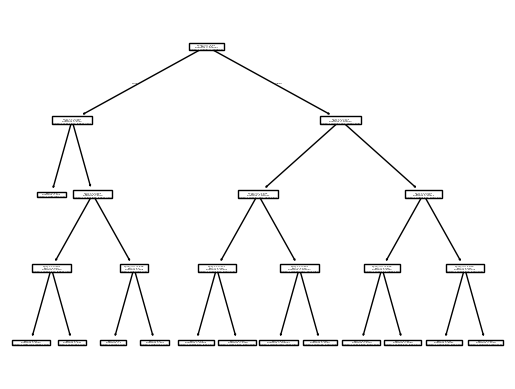

In [26]:
plot_tree(dt)
plt.show()

In [27]:
y_pred_svm = svm.decision_function(X_test)

In [28]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.954
